In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
from tensorflow.keras.datasets import fashion_mnist

(x_train_set, y_train_set), (x_test, y_test) = fashion_mnist.load_data()

In [21]:
x_train_set.shape, y_train_set.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

9


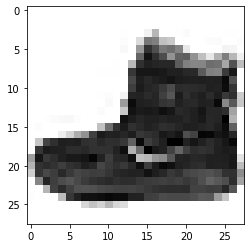

In [22]:
#畫出樣本
i = 0
print(y_train_set[i])
plt.imshow(x_train_set[i], cmap='binary')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_valid, y_train, y_valid = train_test_split(x_train_set, y_train_set, random_state=1)

In [24]:
x_train = x_train/255.0
x_valid = x_valid/255.0
x_test = x_test/255.0

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

In [26]:
model = Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(units=300, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=10, activation='softmax'),
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [30]:
train = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2461 - accuracy: 0.9103 - val_loss: 0.3453 - val_accuracy: 0.8761
Epoch 2/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2400 - accuracy: 0.9126 - val_loss: 0.3247 - val_accuracy: 0.8833
Epoch 3/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2357 - accuracy: 0.9137 - val_loss: 0.3144 - val_accuracy: 0.8871
Epoch 4/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2310 - accuracy: 0.9156 - val_loss: 0.3210 - val_accuracy: 0.8869
Epoch 5/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2261 - accuracy: 0.9168 - val_loss: 0.5841 - val_accuracy: 0.7935
Epoch 6/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2212 - accuracy: 0.9198 - val_loss: 0.4506 - val_accuracy: 0.8520
Epoch 7/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2158 - accuracy: 0.9214 - val_loss: 0.3268 - val_accuracy:

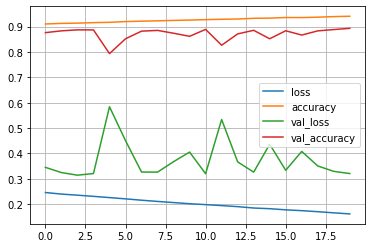

In [31]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

In [33]:
#evaluate
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3461 - accuracy: 0.8884


[0.3460966944694519, 0.8884000182151794]

In [34]:
#Predict

y_proba = model.predict(x_test)
y_proba[:3].round(2)

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
y_pred = np.argmax(y_proba, axis=1)
y_pred[:3]

array([9, 2, 1], dtype=int64)

In [36]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[837,   0,  15,  31,   3,   3,  99,   0,  12,   0],
       [  1, 965,   3,  24,   4,   0,   2,   0,   1,   0],
       [ 10,   0, 820,  19,  69,   0,  80,   0,   2,   0],
       [ 17,   5,   8, 942,  10,   1,  11,   0,   6,   0],
       [  1,   0, 102,  60, 762,   0,  69,   0,   6,   0],
       [  0,   0,   0,   1,   0, 964,   0,  25,   1,   9],
       [107,   1,  67,  40,  43,   0, 727,   0,  15,   0],
       [  0,   0,   0,   0,   0,  18,   0, 969,   1,  12],
       [  5,   0,   4,   8,   2,   2,   4,   5, 970,   0],
       [  0,   0,   0,   0,   0,  13,   1,  58,   0, 928]], dtype=int64)